<a href="https://colab.research.google.com/github/eslamalaa10/fruits-360_dataset/blob/master/SVM_pattern_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

In [1]:
# Import required libraries
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/eslamalaa10/fruits-360_dataset.git

import numpy as np
import os
from imutils import paths
import cv2
import pandas as pd
def load_images(path):
  print("[INFO] loading images...")
  imagePaths = list(paths.list_images(path))
  imagePaths.sort()
  data = []
  labels = []
  for imagePath in imagePaths:
    print(imagePath)
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (100, 100))
    data.append(image)
    labels.append(label)
  data = np.array(data)
  labels=pd.get_dummies(labels)
  labels = np.array(labels)
  return data,labels
x_test,y_test=load_images('/content/fruits-360_dataset/newtest')
x_train,y_train=load_images('/content/fruits-360_dataset/newtrain')

fatal: destination path 'fruits-360_dataset' already exists and is not an empty directory.
[INFO] loading images...
/content/fruits-360_dataset/newtest/Apple Braeburn/321_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/322_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/323_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/324_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/325_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/326_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/327_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/32_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/33_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/34_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/35_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/36_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/37_100.jpg
/content/fruits-360_dataset/newtest/Apple Braeburn/38_100.jpg
/content/

In [3]:
fruits=[]
imagePaths = list(paths.list_images('/content/fruits-360_dataset/newtest'))
imagePaths.sort()

for imagePath in imagePaths:
  fruits.append(imagePath.split(os.path.sep)[-2])
fruits = list(dict.fromkeys(fruits))
print(fruits)

['Apple Braeburn', 'Banana', 'Dates', 'Huckleberry']


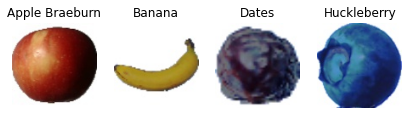

In [4]:
# Display samples of the dataset
fig, axes = plt.subplots(1, 4, figsize=(7, 3))

axes[0].set_title(fruits[(int(np.where( y_train[0] == 1)[0]))])
axes[0].imshow(x_train[0])
axes[0].axis('off')

axes[1].set_title(fruits[(int(np.where( y_train[600] == 1)[0]))])
axes[1].imshow(x_train[600])
axes[1].axis('off')

axes[2].set_title(fruits[(int(np.where( y_train[1200] == 1)[0]))])
axes[2].imshow(x_train[1200])
axes[2].axis('off')

axes[3].set_title(fruits[(int(np.where( y_train[1800] == 1)[0]))])
axes[3].imshow(x_train[1800])
axes[3].axis('off')
plt.show()

In [5]:
x_train.shape

(1962, 100, 100, 3)

In [0]:
# Normalize the dataset in the interval [0,1]
x_train = x_train.reshape(x_train.shape[0],100*100*3)/255.0
x_test = x_test.reshape(x_test.shape[0],100*100*3)/255.0

#### Model Structure
#### f(x,W,b)=Wx+B

In [0]:
# hyperparameters
learning_rate = 1.0
epochs = 100

batch_size = 100  
batches = int(x_train.shape[0] / batch_size) 

In [0]:
k=x_train.shape[1]

In [0]:
X = tf.placeholder(tf.float32, [None, k])
Y = tf.placeholder(tf.float32, [None, 4])

W = tf.Variable(tf.truncated_normal([k, 4]))
B = tf.Variable(tf.zeros(4))

In [0]:
model_output = tf.matmul(X, W) + B

Multiclass SVM loss function 


In [0]:
# Declare loss function
# L2 regularization

alpha = tf.constant([0.00001])
delta = tf.constant([0.01], tf.float32)

regulation_term = alpha * tf.nn.l2_loss(W) 

S_truelabel = tf.reduce_sum(tf.multiply(Y,model_output),axis=1 ,keepdims=True)
loss = tf.reduce_mean(tf.reduce_sum(tf.maximum(0.0, model_output - S_truelabel + delta), 1) - delta )
loss += regulation_term

In [12]:
# Declare the optimizer for optimizing the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


epoch:0 loss=[0.5654619]
epoch:1 loss=[0.56524694]
epoch:2 loss=[0.5650321]
epoch:3 loss=[0.5648173]
epoch:4 loss=[0.5646027]
epoch:5 loss=[0.5643881]
epoch:6 loss=[0.5641736]
epoch:7 loss=[0.5639591]
epoch:8 loss=[0.5637448]
epoch:9 loss=[0.56353045]
epoch:10 loss=[0.56331635]
epoch:11 loss=[0.5631022]
epoch:12 loss=[0.56288815]
epoch:13 loss=[0.5626742]
epoch:14 loss=[0.56246036]
epoch:15 loss=[0.56224656]
epoch:16 loss=[0.5620329]
epoch:17 loss=[0.56181926]
epoch:18 loss=[0.5616057]
epoch:19 loss=[0.56139225]
epoch:20 loss=[0.56117886]
epoch:21 loss=[0.5609656]
epoch:22 loss=[1506.1516]
epoch:23 loss=[349.0979]
epoch:24 loss=[0.5280616]
epoch:25 loss=[0.52786094]
epoch:26 loss=[0.5276603]
epoch:27 loss=[0.52745974]
epoch:28 loss=[0.52725923]
epoch:29 loss=[0.52705884]
epoch:30 loss=[0.5268585]
epoch:31 loss=[0.5266583]
epoch:32 loss=[0.5264581]
epoch:33 loss=[0.526258]
epoch:34 loss=[0.52605796]
epoch:35 loss=[0.525858]
epoch:36 loss=[0.52565813]
epoch:37 loss=[0.5254583]
epoch:38 l

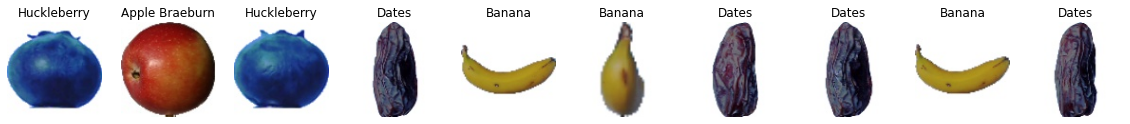

In [17]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sesh.run(optimizer, feed_dict={X: x, Y:y})
            c = sesh.run(loss, feed_dict={X:x, Y:y})
        if epoch % 1 == 0 :
            print(f'epoch:{epoch} loss={c}')
            
    # Test the model
    correct_prediction = tf.equal(tf.argmax(sesh.run(model_output,feed_dict={X: x_test, Y:y_test}),1), tf.argmax(y_test,1))
    accuracy_test = tf.multiply(100.0,tf.reduce_mean(tf.cast(correct_prediction, "float")))
    print('test acc',sesh.run(accuracy_test))

    correct_prediction = tf.equal(tf.argmax(sesh.run(model_output,feed_dict={X: x_train, Y:y_train}),1), tf.argmax(y_train,1))
    accuracy_train = tf.multiply(100.0,tf.reduce_mean(tf.cast(correct_prediction, "float")))
    print('train acc',sesh.run(accuracy_train),'\n')
    
    # show some of test sampel with prediction 
    fig, axes = plt.subplots(1, 10, figsize=(20, 50))
    rand=np.random.randint(600)
    t_imgs=[]
    rand_number=[]
    for i in range(10):
      rand=np.random.randint(600)
      t_imgs.append(x_test[rand])
      rand_number.append(rand)

    for img, ax in zip(t_imgs[0:10], axes):
        guess = np.argmax(sesh.run(model_output, feed_dict={X: [img]}))
        ax.set_title(fruits[guess])
        ax.imshow(img.reshape((100,100,3)))
        ax.axis('off')
